In [162]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
df= pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
mars_df=df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [118]:
mars_df['terrestrial_date']=pd.to_datetime(mars_df['terrestrial_date'])
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [122]:
#how many months exist on mars?
mars_df['month'].max()
#12 according to the table's numbering.

12

In [128]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
mars_df['sol'].max()-mars_df['sol'].min()
#1,967

1967

<AxesSubplot:xlabel='month'>

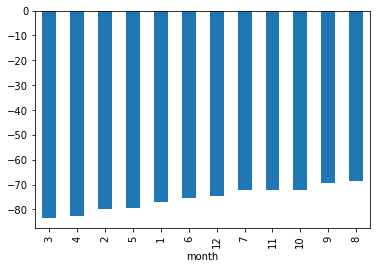

In [190]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
#Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
answer=mars_df.groupby('month').mean().sort_values('min_temp')
focused_answer= answer['min_temp']
focused_answer.plot.bar()
#Coldest are months 3,4,2.  Warmest are months 10,9,8.

<AxesSubplot:xlabel='month'>

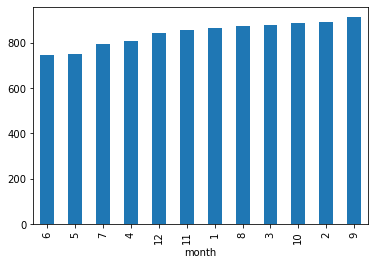

In [192]:
#Which months have the lowest and the highest atmospheric pressure on Mars? 
#Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
answer=mars_df.groupby('month').mean().sort_values('pressure')
focused_answer= answer['pressure']
focused_answer.plot.bar()
#lowest are months 6,5,7. Highest are months 10,2,9.

<AxesSubplot:xlabel='terrestrial_date'>

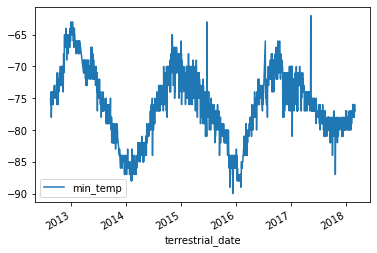

In [205]:
#About how many terrestrial (Earth) days exist in a Martian year? 
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
#Visually estimate the result by plotting the daily minimum temperature.
daily=mars_df[['min_temp']].set_index(mars_df['terrestrial_date'])
daily.plot()
#The Martian annual cycle repeats approximately 2 months short of 2 Earth years (or about 670 Earth days = 365x2-60).

In [20]:
#Export the DataFrame to a CSV file.
mars_df.to_csv('mars_df.csv')